In [1]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos
    
# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

# Para otimização dos sistemas
from scipy import optimize

import random

In [2]:
def somar(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] + B[i][j]

    return C

def sub(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] - B[i][j]

    return C

def dpsidt(t,psi, H):
    A = np.zeros((2,2), dtype=np.complex_)
    A = np.dot(complex(0,1),H)
    return -1*np.matmul(A,psi)

def rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0):
    
    n = (int)((t-t0))
    S = np.zeros((2,int(t)), dtype=np.complex_)
    r = 0
    
    for i in range(1 + p, n + 1 + p):
        
        S[0][r] = psi0[0][0]
        S[1][r] = psi0[1][0]
        
        k1 = dpsidt(t0, psi0, H)
        k2 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k1)), H)
        k3 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k2)), H)
        k4 = dpsidt(t0 + h, somar(psi0, np.dot(h, k3)), H)
        
        A = somar(np.dot(2,k3), k4)
        B = somar(np.dot(2,k2), k1)
        C = somar(A, B)
 
        psi0 = somar(psi0,np.dot((h / 6.0),(C)))
    
        t0 = t0 + h
        
        r = r + 1
        
    return S

def fo(x, D, H, i, psi0):
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, x[0]], [x[0], 0]] #-5, -5
    #H2 = [[0, x[1]], [x[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, x[1]], [x[1], 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    O = [[Result3[0][1]],[Result3[1][1]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2)

In [3]:
x = []
x.append(random.uniform(-5, 5))
a=x[0]
x.append(x[0])

i = 0

psi0 = [[complex(0.80,0)],[complex(0.60,0)]]
psid = [[complex(1/np.sqrt(2),0)],[complex(1/np.sqrt(2),0)]]
h = 0.01

E = np.zeros((2,2))
I = np.zeros((2,2))
R = np.zeros((2,2), dtype=np.complex_)
H = E.astype(complex)

A = (1/2*np.pi)
B = (3/2*np.pi)

I = [[1, 0], [0, 1]]
H = [[A, 0], [0, B]]
R = H

D = np.zeros((2,1), dtype=np.complex_)
D[0][0] = psid[0][0]
D[1][0] = psid[1][0]

Resp = np.zeros((2,1000), dtype=np.complex_)

while i < 1000:
    
    print("iteracao: ", (i+1))
    
    Resp[0][i] = psi0[0][0]
    Resp[1][i] = psi0[1][0]

    resultado = optimize.minimize(fo, x, args=(D, H, i, psi0), method='CG')
    
    x = []
    u = np.zeros((2,1))
    x.append(random.uniform(-5, 5))
    a=x[0]
    x.append(x[0])
    
    u = [[0, resultado.x[0]],[resultado.x[0], 0]]
        
    i = i + 1
    H = somar(H, u)
    
    psi_t = np.zeros((2,2), dtype=np.complex_)
    
    psi_t = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    
    psi0[0][0] = psi_t[0][1]
    psi0[1][0] = psi_t[1][1]
    
    H = [[A, 0], [0, B]]
    
    print(psi0)

iteracao:  1
[[(0.7998558775096304-0.013944138586276711j)], [(0.5992745864354823-0.030101597929648033j)]]
iteracao:  2
[[(0.799313547561397-0.02915623994030119j)], [(0.5970123399631039-0.06183875920950602j)]]
iteracao:  3
[[(0.7983883306802094-0.04436980754911103j)], [(0.5931877687373373-0.09346477626208408j)]]
iteracao:  4
[[(0.7970782410517567-0.059571082551696325j)], [(0.5878066046929779-0.1249037987098806j)]]
iteracao:  5
[[(0.7953985814129052-0.07468004585681202j)], [(0.5808881223138236-0.155990308665684j)]]
iteracao:  6
[[(0.7933413661419543-0.0897357048099778j)], [(0.5724442401002571-0.18672057077423365j)]]
iteracao:  7
[[(0.7909109426534988-0.1047176090456157j)], [(0.5624947508709865-0.21701096246832247j)]]
iteracao:  8
[[(0.7881082492598319-0.11961820462383965j)], [(0.5510611037003598-0.2467965395217337j)]]
iteracao:  9
[[(0.7849467131915414-0.134403580680808j)], [(0.5381744799015179-0.27597565728004947j)]]
iteracao:  10
[[(0.7814241956710831-0.14907733533012893j)], [(0.523861

[[(0.07791190556920405-0.6099063911577534j)], [(-0.16587913895298467+0.770991590515894j)]]
iteracao:  95
[[(0.0713707784879839-0.6104938065098484j)], [(-0.13178060391611657+0.7777129219268908j)]]
iteracao:  96
[[(0.06484935159510047-0.6111123472710814j)], [(-0.09740967343893092+0.7828458394597236j)]]
iteracao:  97
[[(0.058323320512597636-0.6117653969380821j)], [(-0.0628278795642787+0.7863804035517937j)]]
iteracao:  98
[[(0.051788039201033614-0.6124523606386841j)], [(-0.028112647012760547+0.7883081732976438j)]]
iteracao:  99
[[(0.04524311790089976-0.6131725332532981j)], [(0.006655026161814195+0.7886242497907977j)]]
iteracao:  100
[[(0.038688823478586785-0.6139257646956752j)], [(0.041393509883277176+0.787327695196899j)]]
iteracao:  101
[[(0.03207576261396444-0.614708502038531j)], [(0.07606006033335647+0.7844230121681566j)]]
iteracao:  102
[[(0.025421061672013148-0.6155189070958064j)], [(0.11056047172373476+0.7799144943290817j)]]
iteracao:  103
[[(0.018785821921447742-0.6163657207023333j)

[[(-0.7003968000025199-0.3077861831984848j)], [(-0.44415901771479666-0.46629898156901317j)]]
iteracao:  183
[[(-0.706509601603265-0.29535800520651123j)], [(-0.46649375740983956-0.44270914952426516j)]]
iteracao:  184
[[(-0.7123526281718058-0.2827704605165738j)], [(-0.48765400208453535-0.4180767383383319j)]]
iteracao:  185
[[(-0.7179482252085803-0.26999665287980296j)], [(-0.5076094882786215-0.3924089012446489j)]]
iteracao:  186
[[(-0.72324399289281-0.25710126363923996j)], [(-0.5262822925955729-0.3658469631053818j)]]
iteracao:  187
[[(-0.7282449773051534-0.24408373931990732j)], [(-0.5436373212827281-0.3384388112971023j)]]
iteracao:  188
[[(-0.732954363880214-0.2309430679623j)], [(-0.5596407018672216-0.3102345393692661j)]]
iteracao:  189
[[(-0.7373707772518078-0.21768342906431068j)], [(-0.5742579904686332-0.28129345290021623j)]]
iteracao:  190
[[(-0.7414961259087484-0.20430034123647856j)], [(-0.5874600297787734-0.25166557941365375j)]]
iteracao:  191
[[(-0.7453114041966258-0.190837422919137

[[(-0.37167616816414256+0.567302147547843j)], [(0.7283174591760674-0.09787112346094948j)]]
iteracao:  267
[[(-0.3629935370043091+0.5714174882311315j)], [(0.7242149079920287-0.1312649684568516j)]]
iteracao:  268
[[(-0.35432187291266326+0.5754134162512552j)], [(0.7185479707445683-0.16445121799826862j)]]
iteracao:  269
[[(-0.34566964706049086+0.5792639792971259j)], [(0.7113520442957278-0.19734230407642817j)]]
iteracao:  270
[[(-0.3370089768646063+0.5830753588564721j)], [(0.7025577900816479-0.22991434369745833j)]]
iteracao:  271
[[(-0.32836999781356896+0.5867448622213014j)], [(0.69226956999681-0.26204280567823324j)]]
iteracao:  272
[[(-0.319742213952287+0.590311102114456j)], [(0.6804802298174002-0.2936738913262382j)]]
iteracao:  273
[[(-0.31114508904967747+0.5937350168311901j)], [(0.6672522066188658-0.32471823834843483j)]]
iteracao:  274
[[(-0.30252201660024375+0.5971373595116518j)], [(0.6525090116127664-0.3551610497223772j)]]
iteracao:  275
[[(-0.2939514302354518+0.6003681311787211j)], [(

[[(0.3913799994116207+0.5906116610023767j)], [(-0.5127990502383477+0.48480580483933067j)]]
iteracao:  349
[[(0.4014265232213694+0.5852034337067059j)], [(-0.48844676790578445+0.5077533011801687j)]]
iteracao:  350
[[(0.41140594678775944+0.5795816391850772j)], [(-0.4630687420059178+0.5295258094474742j)]]
iteracao:  351
[[(0.4213518323314403+0.5737804568215441j)], [(-0.4366793822436665+0.5500451890823128j)]]
iteracao:  352
[[(0.43122521993853086+0.5677701059344172j)], [(-0.4093752332049069+0.569292373921647j)]]
iteracao:  353
[[(0.4410054860975761+0.5615418795109983j)], [(-0.38123103495617255+0.5872373870643842j)]]
iteracao:  354
[[(0.4507165992911437+0.555117489675548j)], [(-0.3522802746062088+0.6038192608869837j)]]
iteracao:  355
[[(0.46035888402125785+0.548499479674092j)], [(-0.32258365529852445+0.6189973956902106j)]]
iteracao:  356
[[(0.46992645957583046+0.5416865295646035j)], [(-0.2922094710365893+0.6327388269060261j)]]
iteracao:  357
[[(0.47936669449634356+0.5346579253610529j)], [(-0

[[(0.6684854355751064-0.2666109717246467j)], [(0.0019275165604755728-0.6942924909109958j)]]
iteracao:  431
[[(0.6634209638442752-0.2770552664557976j)], [(-0.031109084974693925-0.6943667581996549j)]]
iteracao:  432
[[(0.6582007698092142-0.28738145097769047j)], [(-0.0641214156256801-0.692872324630196j)]]
iteracao:  433
[[(0.6528077219072077-0.2975852174885409j)], [(-0.0970445132865475-0.6898314611841693j)]]
iteracao:  434
[[(0.6473142678634327-0.30767455534406585j)], [(-0.12977417487294005-0.6851855485359211j)]]
iteracao:  435
[[(0.6416324329163369-0.3176331678999449j)], [(-0.1622769315542352-0.6790310411618795j)]]
iteracao:  436
[[(0.6357840066560071-0.3274596542009659j)], [(-0.19447420193862164-0.6713632564802847j)]]
iteracao:  437
[[(0.6298180583698019-0.3371645384321594j)], [(-0.2262720764098677-0.6621557221356111j)]]
iteracao:  438
[[(0.6237513438549748-0.3467542062647036j)], [(-0.25759003714843554-0.6514162415135449j)]]
iteracao:  439
[[(0.6175022065716252-0.35619519794736343j)], [

[[(-0.05650459747827796-0.6896204527634154j)], [(0.5035707871276608+0.517346386507571j)]]
iteracao:  515
[[(-0.06692972041757715-0.6890621920261275j)], [(0.5268333799952304+0.4931128241871315j)]]
iteracao:  516
[[(-0.07736999700335932-0.6883521674424556j)], [(0.5489369377334268+0.46781767288789167j)]]
iteracao:  517
[[(-0.08782164957898297-0.6874907732522468j)], [(0.5698303534528979+0.44151684259921925j)]]
iteracao:  518
[[(-0.098281979761534-0.6864775020124874j)], [(0.5894666056846924+0.41426847797961464j)]]
iteracao:  519
[[(-0.10874785148075912-0.6853127263861412j)], [(0.6078006104519348+0.386133071737239j)]]
iteracao:  520
[[(-0.11921345801282977-0.6840018308162923j)], [(0.6247848791737532+0.3571742723814911j)]]
iteracao:  521
[[(-0.12968244498236034-0.6825348132704582j)], [(0.6403921253134468+0.3274546947654743j)]]
iteracao:  522
[[(-0.14015595823114868-0.6809030339427752j)], [(0.6545957747594451+0.29703820710537254j)]]
iteracao:  523
[[(-0.15062230901067436-0.6791252077240245j)],

[[(-0.6990461327886784-0.16945797784509262j)], [(-0.6800451221166312-0.14197564402935153j)]]
iteracao:  594
[[(-0.701687947089205-0.1580798745844284j)], [(-0.6860592905928898-0.10939552783533474j)]]
iteracao:  595
[[(-0.7041336540107066-0.1466511405784936j)], [(-0.6905272680175447-0.07655903514649356j)]]
iteracao:  596
[[(-0.7063799332290644-0.1351971384552215j)], [(-0.6934345586963072-0.04356133487459315j)]]
iteracao:  597
[[(-0.708428299249655-0.12370100428712943j)], [(-0.694779141263034-0.010454881908425216j)]]
iteracao:  598
[[(-0.7102777690522575-0.11218904749843621j)], [(-0.6945541176371788+0.022663612641371213j)]]
iteracao:  599
[[(-0.7119287791871312-0.10065285986082509j)], [(-0.6927627529464226+0.055732723548233824j)]]
iteracao:  600
[[(-0.7133792349010846-0.08907817872159955j)], [(-0.6894112448931934+0.08869742839123088j)]]
iteracao:  601
[[(-0.7146298174375046-0.07748562028703607j)], [(-0.6845041190145396+0.12146714269581457j)]]
iteracao:  602
[[(-0.7156846492741769-0.065898

[[(-0.3892645002217529+0.5832156306952797j)], [(0.6826549205835529-0.20570581947603472j)]]
iteracao:  671
[[(-0.3801498977488833+0.5889775075375764j)], [(0.6724538984116555-0.23748105834956829j)]]
iteracao:  672
[[(-0.3709477217176981+0.594629079512422j)], [(0.6607435334539179-0.2687600717758482j)]]
iteracao:  673
[[(-0.36167954276501557+0.6001172209957566j)], [(0.6475959881539404-0.2994438396295399j)]]
iteracao:  674
[[(-0.3523260618792226+0.6054898889603098j)], [(0.6329957660705238-0.329491499289079j)]]
iteracao:  675
[[(-0.3429027706672203+0.6107161100372187j)], [(0.6170027028042375-0.3588190838646042j)]]
iteracao:  676
[[(-0.33342079617137166+0.6157816525497241j)], [(0.5996665378984399-0.3873545142578904j)]]
iteracao:  677
[[(-0.3238603449989422+0.6207215259879196j)], [(0.5809897571256523-0.41505435003010943j)]]
iteracao:  678
[[(-0.31423206059247294+0.6255201236095931j)], [(0.5610282410670436-0.44184844342359825j)]]
iteracao:  679
[[(-0.3045492965077351+0.6301627960937758j)], [(0.

[[(0.5050457396952424+0.49810621881331196j)], [(-0.16901221714488063+0.6842907328392279j)]]
iteracao:  760
[[(0.5129863349817044+0.49015012857391127j)], [(-0.13646490306975836+0.6913574637866824j)]]
iteracao:  761
[[(0.5207985960666974+0.4820611367674232j)], [(-0.10362565838188739+0.6968841700917439j)]]
iteracao:  762
[[(0.5284953351139436+0.47384337566056073j)], [(-0.07055708700242683+0.7008471833066591j)]]
iteracao:  763
[[(0.5360603446802694+0.4654965959583179j)], [(-0.03734244875179546+0.7032479706526846j)]]
iteracao:  764
[[(0.5434782023329282+0.45702281359532443j)], [(-0.004063737829743924+0.7040916262066906j)]]
iteracao:  765
[[(0.5507748012293262+0.4484250850773728j)], [(0.02922364243949825+0.7033548042542569j)]]
iteracao:  766
[[(0.5579260144975374+0.4397057229319096j)], [(0.06243153377666719+0.7010561201663276j)]]
iteracao:  767
[[(0.5649373760206715+0.4308669680575672j)], [(0.09549132991582245+0.697194924903319j)]]
iteracao:  768
[[(0.5718186222605426+0.4219091658004168j)], 

[[(0.570130065106235-0.41793200017740706j)], [(-0.5188957220813535-0.4806575869766278j)]]
iteracao:  849
[[(0.5634143973483925-0.42674280540607007j)], [(-0.5410375247145299-0.4557774960354092j)]]
iteracao:  850
[[(0.556572301880042-0.4354517930566322j)], [(-0.5619774545056544-0.42987240362908935j)]]
iteracao:  851
[[(0.549597551758681-0.44404776234360727j)], [(-0.581676196056896-0.40300974280286733j)]]
iteracao:  852
[[(0.5424877108078905-0.4525218168722551j)], [(-0.6000954265712802-0.37525524886937617j)]]
iteracao:  853
[[(0.5352484908926176-0.4608764732924998j)], [(-0.6171910044247452-0.34666572842227106j)]]
iteracao:  854
[[(0.5278802150946665-0.46910582417909136j)], [(-0.6329281296032857-0.3173076121943589j)]]
iteracao:  855
[[(0.52040035158457-0.4772393589966276j)], [(-0.647248402373625-0.2872203119743025j)]]
iteracao:  856
[[(0.5127907756623109-0.48523354107773625j)], [(-0.6601508197280046-0.2565050873490239j)]]
iteracao:  857
[[(0.5050728160677131-0.4931347783081282j)], [(-0.671

[[(-0.22548489668862498-0.6686883780845654j)], [(0.7062353785980862+0.05695553049613206j)]]
iteracao:  930
[[(-0.2359557912929048-0.6651575300455552j)], [(0.7080470455997184+0.02365658424372724j)]]
iteracao:  931
[[(-0.24637435735084484-0.6614516127707566j)], [(0.7082989522687453-0.009693406173247827j)]]
iteracao:  932
[[(-0.25673736396442653-0.6575837201222431j)], [(0.7069788407671188-0.04301654927438055j)]]
iteracao:  933
[[(-0.2670421985165261-0.653552504334398j)], [(0.7040916416277715-0.07623959753629976j)]]
iteracao:  934
[[(-0.2772883935026451-0.6493742661205322j)], [(0.6996295249724465-0.10928249993788236j)]]
iteracao:  935
[[(-0.28746777067854046-0.6450111382600681j)], [(0.6936382692062011-0.14208726696879898j)]]
iteracao:  936
[[(-0.2975831002675387-0.6404977992922083j)], [(0.6860997236974259-0.17456793578311322j)]]
iteracao:  937
[[(-0.3076330333764728-0.6358352767971486j)], [(0.6770306482321797-0.20665150945071975j)]]
iteracao:  938
[[(-0.3176089549909854-0.6310030227342626j

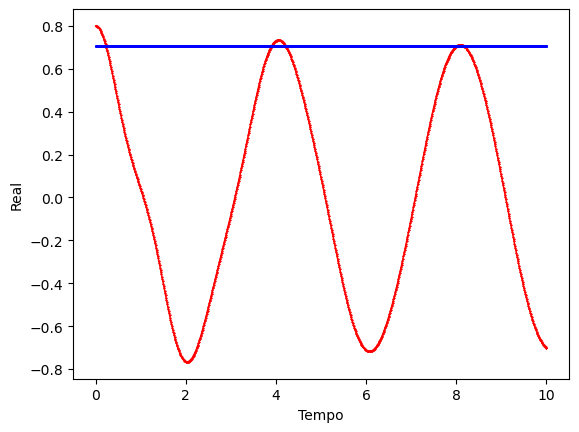

In [4]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[0]] 
y = [ele.imag for ele in Resp[0]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.show()

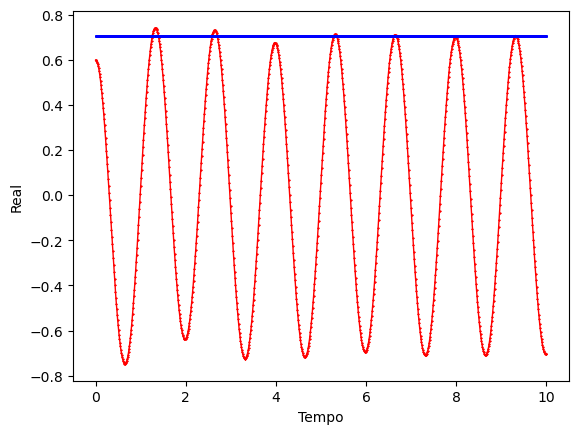

In [5]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[1]] 
y = [ele.imag for ele in Resp[1]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.show()